## 1 - Introduction:



## 2 - Objective:

Train several machine learning (ML) models to estimate the probability that an individual donated blood in March 2007 using the `blooddonation` data set, compare these predictive power these models and select the best performing model. In this project we discuss how to:

* Clean the data
* Perform exploratory data analysis
* Split the data into training and test subsets
* Fit predictive models with a binary response variable, using the following ML algorithms:
    + k-Nearest-Neighbors (kNN) with k-fold cross validation
    + Logistic regression with L2, i.e. ridge regression, penalty
    + Random forest classifier with out-of-bag (oob) error
* Make predictions with these models
* Test and compare the predictive power of each model

### Description of data:

The data set `blooddonation` includes five (5) variables, describing the blood donation history of 776 individuals. Descriptions for each of the columns is given below:

* `lastdon_m`: The number of months since the individual's last donation
* `dons_n`: The total number of donations that an individual has given
* `tv_don`: The total value of blood donated by an individual
* `firstdon_m`: The number of months since the individual's first donation
* `don_03_2007`: An binary variable, indicating whether an individual donated blood in March 2007

As stated previously, `don_03_2007` is the variable of interest, and I will fit three (3) models using `lastdon_m`, `dons_n`, `tv_don` and `firstdon_m`, to predict `don_03_2007`. I will refer to `don_03_2007` as the response variable and the other four (4) variables listed as explanatory variables when training our models.

## 3 - Experimental Procedure:

### Load data set:

In [116]:
import os
os.chdir('C:/Users/sgouveia/Documents/Datascience/') # Set directory

%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
# Import blooddonation.csv file as a pandas DataFrame, specifying our column names as described and setting the DataFrame
# index to be equal to the ID values listed in the first column of the .csv file
bd = pd.read_csv('blooddonation.csv', index_col = 0, names = ['lastdon_m', 'dons_n', 'tv_don', 'firstdon_m', 'don_03_2007'])

# Define pointers to DataFrame columns for convenience
lastdon_m = bd.lastdon_m
dons_n = bd.dons_n
tv_don = bd.tv_don
firstdon_m = bd.firstdon_m
don_03_2007 = bd.don_03_2007

# Display the first five (5) rows of the DataFrame `bd`
bd.head(n = 5)

,lastdon_m,dons_n,tv_don,firstdon_m,don_03_2007
350,74,1,65,74,1
74,72,1,113,72,1
405,40,1,62,40,1
541,39,1,113,39,1
48,38,1,109,38,1


### Data cleaning:

Before I can begin working with the data I need to check to see if I need to clean the data, if there are any null values in the data and confirm that each variable is of the correct data type (dtype). Here, we can see that none of the variables include null values, and they are each of dtype `int64`. I do not need to drop any observations, nor do I need to impute values to replace null entries, since no column contains null values.

Each column is of an integer dtype, as expected, so that there is no further steps that I must take in order to clean the data.

In [86]:
bd.isnull().sum()

lastdon_m      0
dons_n         0
tv_don         0
firstdon_m     0
don_03_2007    0
dtype: int64

### Exploratory data analysis:

Before I begin training our models, I first examine the data in order to understand the shape of the data, as well as the possible relationships between the response and explanatory variables.

Here, we count the number of rows in the data and the number of observations with a positive outcome for `don_03_2007`, as well as compute the proportion of observations in the data with a positive `don_03_2007` outcome.

In [118]:
bd.count()

lastdon_m      776
dons_n         776
tv_don         776
firstdon_m     776
don_03_2007    776
dtype: int64

In [119]:
len(bd[don_03_2007 == 1])

333

In [120]:
100*(len(bd[don_03_2007 == 1]) / bd.count())[0]

42.912371134020617

Below, plotting **histograms** in order to describe the distribution of each of the variables in the data. Note that there are several observations in `lastdon_m`, `dons_n` and `tv_don` that may be outliers or influential points.

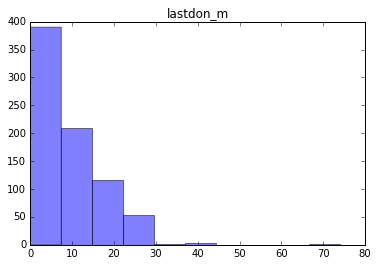

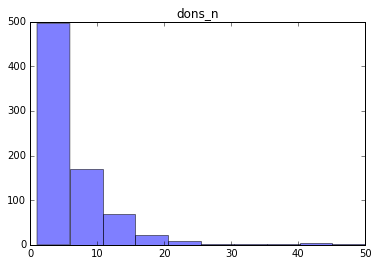

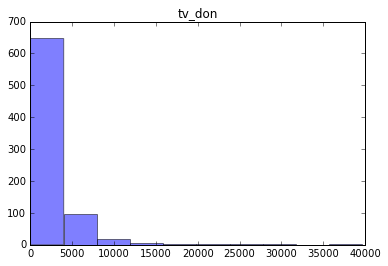

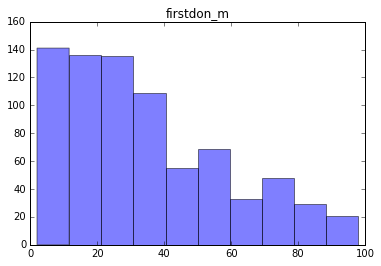

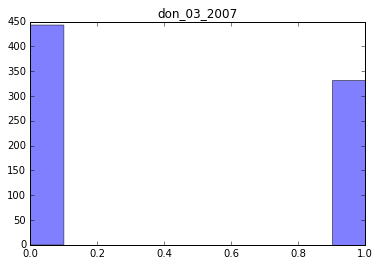

In [90]:
x = np.linspace(-5, 5, 100)

plt.hist(lastdon_m, alpha = 0.5)
plt.title('lastdon_m')
plt.show()

plt.hist(dons_n, alpha = 0.5)
plt.title('dons_n')
plt.show()

plt.hist(tv_don, alpha = 0.5)
plt.title('tv_don')
plt.show()

plt.hist(firstdon_m, alpha = 0.5)
plt.title('firstdon_m')
plt.show()

plt.hist(don_03_2007, alpha = 0.5)
plt.title('don_03_2007')
plt.show()

I create **box plots** for each of the explanatory variables, grouped by response variable, in order to see whether there may be a relationship between the binary response variable and integer-valued explanatory variables. Differences in the location of the mean value (indicated by the solid black line in the box) and the spread of the values across `don_03_2007`, indicates that a relationship may exist betweeN that explanatory variable and the response. Note that this is not equivalent to the existence of a statisticall significant relationship between the variables.

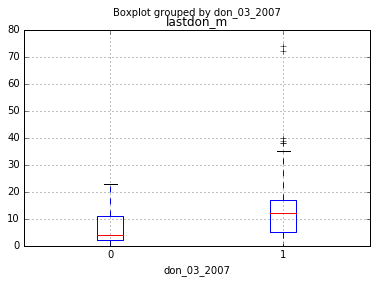

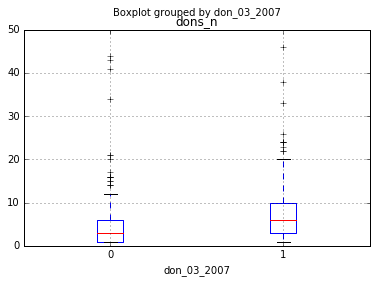

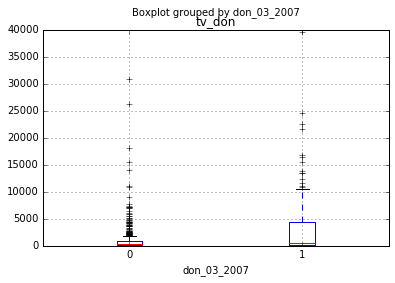

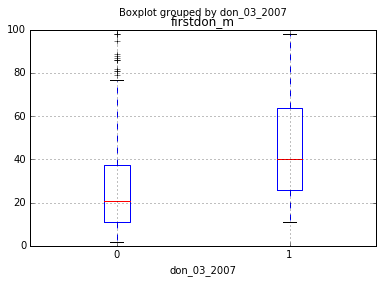

In [121]:
bd.boxplot(column = "lastdon_m", by = "don_03_2007")
plt.title('lastdon_m')
plt.show()

bd.boxplot(column = "dons_n", by = "don_03_2007")
plt.title('dons_n')
plt.show()

bd.boxplot(column = "tv_don", by = "don_03_2007")
plt.title('tv_don')
plt.show()

bd.boxplot(column = "firstdon_m", by = "don_03_2007")
plt.title('firstdon_m')
plt.show()

We can see in the above box plots that there does appear to be some differences in the explanatory variable values across values of `don_03_2007`, but that it is not pronounced.

Below creating **scatter plots** between each of the explanatory variables in order to see whether a relationship may exist between the integer-valued explanatory variables. We can see that some relationship does seem to exist between most of the variables.

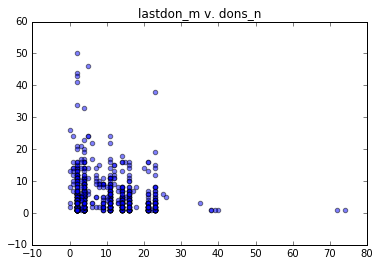

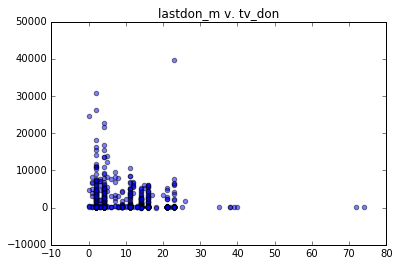

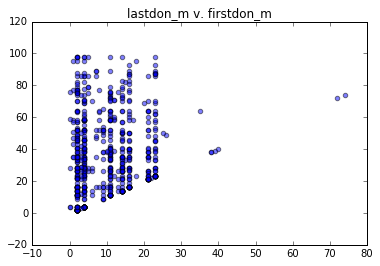

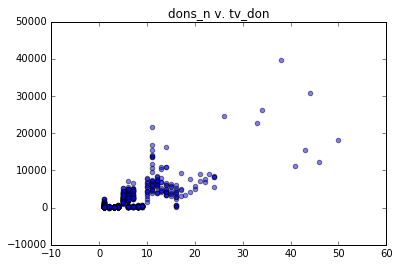

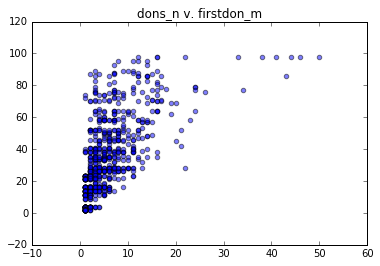

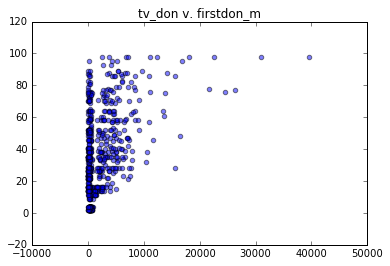

In [92]:
plt.scatter(lastdon_m, dons_n, alpha = 0.5)
plt.title('lastdon_m v. dons_n')
plt.show()

plt.scatter(lastdon_m, tv_don, alpha = 0.5)
plt.title('lastdon_m v. tv_don')
plt.show()

plt.scatter(lastdon_m, firstdon_m, alpha = 0.5)
plt.title('lastdon_m v. firstdon_m')
plt.show()

plt.scatter(dons_n, tv_don, alpha = 0.5)
plt.title('dons_n v. tv_don')
plt.show()

plt.scatter(dons_n, firstdon_m, alpha = 0.5)
plt.title('dons_n v. firstdon_m')
plt.show()

plt.scatter(tv_don, firstdon_m, alpha = 0.5)
plt.title('tv_don v. firstdon_m')
plt.show()

### Model fitting:

Before I begin building models, I import libraries that will be needed throughout the remainder of the project. I also `concat` the explanatory variables together so that we can easily refer to them as a single set of variables while building the models, and reshape variables as `numpy` `ndarray` objects so that the ML functions from the `sklearn` library can interpret their values.

In [122]:
import sklearn.cross_validation
import sklearn.decomposition
import sklearn.grid_search
import sklearn.metrics

# ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split

X_ = pd.concat([lastdon_m, dons_n, tv_don, firstdon_m], axis = 1)

X = X_.as_matrix()
y = don_03_2007.as_matrix()

X

array([[ 74,   1,  65,  74],
       [ 72,   1, 113,  72],
       [ 40,   1,  62,  40],
       ..., 
       [  0,   8, 349,  59],
       [  0,   2, 338,   4],
       [  0,   3,  37,   4]], dtype=int64)

#### Split data into test and training subsets:

Before fitting the models, I must first partition the data into **training** and **test** data. I will use the training data, `X_train` and `y_train`, as raw material with which to build our predictive models and the test data, `X_test` and `y_test`, to assess the predictive power of our models. These data partitions _must_ be disjoint - the test data loses its usefulness in assessing the model's performance if it was used to train the models.

The expression below allows me to reproduce a random partioning of the data such that approximately 80% of the data is included in the training data and 20% included in the test data. I also print the size of the data partitions in order to compare the sizes of each subset.

In [123]:
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split \
(X, y, test_size = 0.2, random_state = 1234)

In [124]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((620L, 4L), (156L, 4L), (620L,), (156L,))


#### k-Nearest-Neighbors (knn)

The knn algorithim assumes that our data is in a feature space (a metric space in particular) and that the data takes a form like scalar values or multidimensional vectors. The values of the variables, therefore, have a notion of relative distance. Each of the observations in the data consist of a set of vectors (explanatory variables) and an associated class label (whether `don_03_2007` is equal to 0 or 1). Note that knn can peform well with an arbitrary number of classes.

This relative distance metric is used to determine whether observations are neighbors of each other, and the "k" in knn indicates the number of neighbors surrounding a given observation that determines that observation's classification. For example, if we set k equal to three (3), then an observation's classification will be determined by the classifications of its three (3) closest neighbors.

Before I can begin training our knn model, I first normalize the explanatory variable values since it is possible for variable values to dominate their contribution to the distance metric if units of measure differ across variables (as they do in our example). I normalize the training and test data to be equal to values between 0 and 1, and will use the new normalized values, `normalizedX_train` and `normalizedX_test`, to train and test the knn model.

In [125]:
from sklearn.preprocessing import Normalizer

scaler_train = Normalizer().fit(X_train)
normalizedX_train = scaler_train.transform(X_train)
scaler_test = Normalizer().fit(X_test)
normalizedX_test = scaler_test.transform(X_test)

# Print normalized data
np.set_printoptions(precision = 7)
print(normalizedX_train[0:5,:])

[[  9.6837716e-04   4.5997915e-03   9.9984942e-01   1.6704506e-02]
 [  1.7352672e-01   5.7842242e-02   7.3266839e-01   6.5554540e-01]
 [  1.7676248e-04   1.4582905e-03   9.9998954e-01   4.3306808e-03]
 [  1.5533067e-01   4.2362910e-02   9.3198402e-01   3.2478231e-01]
 [  4.0203994e-02   3.0152996e-02   9.7829720e-01   2.0101997e-01]]


C:\Users\user\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


I could fit a knn model with any value chosen for k, and use that to predict `don_03_2007` values. However, a much more powerful approach is to leverage cross-validation in order to select an optimal k-value. Cross-validation is a powerful technique to protect predictive models against _overfitting_, which occurs when a model performs well on the training data, but not as well when we attempt to make predictions on new data (here, the test data will be the new data). While there are several different types of cross-validation, we use k-fold cross validation to determine the best number of neighbors to assume in the knn model (note that the "k" in k-fold is not associated with the "k" in knn). In order to identify the parameter value that minimizes error, k-fold cross-validation makes a fixed number of "folds", or partitions, of the data and then performs the following steps for each possible parameter value considered:

* Trains models on each fold
* Averages the error estimate across the folds

Then, k-fold cross-validation identifies the parameter value that minimizes the error estimates across the k-many folds. Here, I use 10-fold cross-validation to identify the optimal k-value (knn) from integers ranging between 1 and 20, and print the best number of neighbors to specify in the knn model.

In [126]:
import sklearn.neighbors

k = np.arange(20)+1
parameters = {'n_neighbors': k}

knn = sklearn.neighbors.KNeighborsClassifier()

# GridSearchCV performs CV across a "grid" of possible parameter values
gs = sklearn.grid_search.GridSearchCV(knn, parameters, cv = 10)
gs.fit(normalizedX_train, y_train)

gs.best_params_['n_neighbors']

17

Now that we know the optimal number of neighbors to specify in the model, I can include this information in the `KNeighborsClassifier` of `sklearn` by defining the `n_neighbors` value to be equal to this number. I do this below, as well as predict classifications (predicted `don_03_2007` values) for the `normalizedX_test` data using the `bestknn` model:

In [127]:
bestknn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = gs.best_params_['n_neighbors'])

y_scoreknn = bestknn.fit(normalizedX_train, y_train).predict(normalizedX_test)
y_scoreknn

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

Below, I print the **confusion matrix** for my model, which compares the number of correctly and incorrectly predicted values. Each observation in the data (equal to 776 in this example) is assigned to one of the cells of the confusion matrix, which can be interpreted as follows:

* **True Negative (TN)**: Correctly predict that the class is 0
* **False Negative (FN)**: Incorrectly predict that the class is 0
* **False Positive (FP)**: Incorrectly predict that the class is 1
* **True Positive (TP)**: Correctly predict that the class is 1

The function `sklearn.metrics.confusion_matrix(i, j)` produces a confusion matrix that is equal to the number of observations known to be in group `i`, but are predicted to be in group `j`. In the matrix below, (1,1) is the TP value, (2,2) if the TN value, (1,2) is the FN value and (2,1) is the FP value.

In [128]:
sklearn.metrics.confusion_matrix(y_test, y_scoreknn)

array([[59, 25],
       [32, 40]])

In order to compare the predictive power of different models, I need to compute a single metric that can be compared across models. I compute two metrics from the above confusion matrix, which I will later use to compute a single value:

Since to compare two different models it is often more convenient to have a single metric rather than several ones, we compute two metrics from the confusion matrix, which I will later combine into one:

* **True Positive Rate (TPR, sensitivity or recall)**: The proportion of positively classified observations that are correctly predicted to be positive (i.e. the higher the recall value, the fewer points I have missed in identifying as being postively classified). The formula is given by `TP / (TP + FN)`.
* **False Positive Rate (FPR, fall-out)**: The proportion of negatively classified observations that are mistakenly predicted to be positive (i.e. the higher the fall-out value, the more negatively classified observations I will missclassified). The formula is given by `FP / (FP + TN)`.

I can combine FPR and TPR into a single metric by (1) computing these metrics at many different thresholds, plotting the resulting FPR and TPR values at these threshold values with the FPR values on the x-axis and TPR values on the y-axis, then calculate the area under this plotted curve. The plotted curve is called the ROC curve and the area under the curve, the AUROC. I can directly compare the predictive performance of models by their AUROC values.

ROC curve fitting for the trained knn model below:

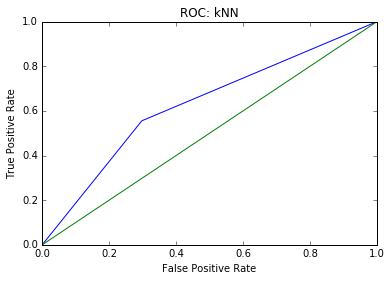

In [129]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_scoreknn)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: kNN')
plt.show()

And, we calculate the AUROC value below:

In [135]:
auc_knn = sklearn.metrics.roc_auc_score(y_test, y_scoreknn)
print("AUROC value:", auc_knn)

('AUROC value:', 0.62896825396825395)


An alternative to the ROC curve is the precision-recall curve, which plots recall on the x-axis and precision (`TP / (TP + FP)`) on the y-axis. I can also use the area under this curve to compare performance across models, which I can compute with the `sklearn.metrics.average_precision_score` function.

In [136]:
avgp_knn = sklearn.metrics.average_precision_score(y_test, y_scoreknn)
print("Average Precision value:", avgp_knn)

('Average Precision value:', 0.68803418803418803)


I can also compute the f1-score of models in order to compare the balance between the precision and the recall across models (it computes the harmonic mean of the precision and recall values). The formula for f1-score is given by `2*((precision * recall) / (precision + recall))`. I can print this value, along with the precision, recall and support (the number of observations of the true response that lie in that classification) values with the `sklearn.metrics.classification_report` function.

In [137]:
print(sklearn.metrics.classification_report(y_test, y_scoreknn))

             precision    recall  f1-score   support

          0       0.65      0.70      0.67        84
          1       0.62      0.56      0.58        72

avg / total       0.63      0.63      0.63       156



#### Logistic Regression (with L2 Penalty/Ridge Regression):

While the previous ML algorithm, knn, produces a non-parametric model, logistic regression does return parameter estimates that it uses to predict the classification of an outcome. Similarly, to how I used cross-validation to mitigate overfitting when training the knn model, I can choose from several different overfitting penalties when training a linear or logistic regression model. 

I use ridge regression; Ridge regression adds a slight bias to the variables (with a penalty parameter (valued between 0 and 1).

I again use 10-fold cross-validation to estimate the best penalty parameter, `CVs.scores_[1].max()`:

In [152]:
import sklearn.linear_model

logistic = sklearn.linear_model.LogisticRegression(penalty = 'l2')
y_scorelg = logistic.fit(X_train, y_train).predict(X_test)

CVs = sklearn.linear_model.LogisticRegressionCV(
    Cs = list(np.power(10.0, np.arange(-10, 10))), penalty = 'l2' , scoring = 'roc_auc' , cv = 10)

CVs.fit(X_train, y_train)

CVs.scores_[1].max()

0.92414529914529919

I predict the `don_03_2007` classifications for `X_test` using the identified `CVs.scores_[1].max()` penalty parameter below with the `sklearn.linear_model.LogisticRegression`. Note that the `LogisticRegression` function parameter that identifies the penalty value, `C`, reads in the value as the inverse of regularization strength. Therefore, I have to account for this by entering `(1 / CVs.scores_[1].max())` as a penalty value.

In [153]:
bestrr = sklearn.linear_model.LogisticRegression(penalty = 'l2', C = (1 / CVs.scores_[1].max()))
y_scorerr = bestrr.fit(X_train, y_train).predict(X_test)
y_scorerr

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

Below, I create a confusion matrix and ROC curve for the ridge regression model, as well as compute the other measures of predictive power associated with the confusion matrix.

In [162]:
sklearn.metrics.confusion_matrix(y_test, y_scorerr)

array([[65, 19],
       [26, 46]])

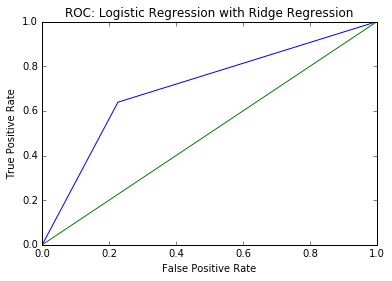

In [163]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_scorerr)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: Logistic Regression with Ridge Regression')
plt.show()

In [164]:
auc_rr = sklearn.metrics.roc_auc_score(y_test, y_scorerr)
print("AUROC value:", auc_rr)

('AUROC value:', 0.70634920634920639)


In [165]:
avgp_rr = sklearn.metrics.average_precision_score(y_test, y_scorerr)
print("Average Precision:", avgp_rr)

('Average Precision:', 0.75662393162393171)


In [166]:
print(sklearn.metrics.classification_report(y_test, y_scorerr))

             precision    recall  f1-score   support

          0       0.71      0.77      0.74        84
          1       0.71      0.64      0.67        72

avg / total       0.71      0.71      0.71       156



#### Random Forest Classifier:

A random forest classifier is an ensemble-type model, meaning that it uses a "divide-and-conquer" approach to improving the predictive power of the model. The ensemble method uses a group of "weak learners" that work together to create a "strong learner."

In a trained decision tree classifier, an input (explanatory variable values) is entered at the top of the branching-downwards tree and, as the input filters through the tree, the observation represented by the input is assigned a position in the feature space that determines the classification for that observation. An individual decision tree classifier is a "weak learner" in ensemble terms (and relative to other algorithms used to train predictive models), but many decision tree classifiers can come together to create a more powerful predictive model, i.e. a "strong learner." A random forest classifier combines individual tree classifiers with the notion of an ensemble such that the random forest is a "strong learner."

The `sklearn.ensemble.RandomForestClassifier` is trained with bootstrap aggregation (a common ML method), such that each new tree is fit from a bootstrap sample of the training observations, `z_i = (x_i, y_i)`. The out-of-bag (oob) error score is the average error for each `z_i` calculated using predictions from the trees that do not contain `z_i` in their respective bootstrap sample. I use this to fit and validate the `RandomForestClassifier`.

Below, I use the oob, setting `oob_score` to be `True`, to approximate a suitable value of n_estimators at which the error stabilizes.

In [171]:
import sklearn.ensemble

rf_oob = sklearn.ensemble.RandomForestClassifier(oob_score = True)
y_scorerf = rf_oob.fit(X_train, y_train).predict(X_test)

y_scorerf

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

I again create a confusion matrix and ROC curve, now for a random forest model, as well as compute the other measures of predictive power associated with the confusion matrix.

In [172]:
sklearn.metrics.confusion_matrix(y_test, y_scorerf)

array([[71, 13],
       [17, 55]])

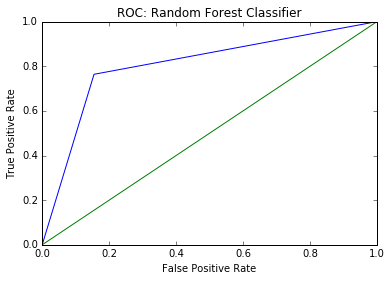

In [173]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_scorerf)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: Random Forest Classifier')
plt.show()

In [177]:
auc_rf = sklearn.metrics.roc_auc_score(y_test, y_scorerf)
print("AUROC value:", auc_rf)

('AUROC value:', 0.80456349206349209)


In [175]:
avgp_rf = sklearn.metrics.average_precision_score(y_test, y_scorerf)
print("Average Precision:", avgp_rf)

('Average Precision:', 0.84084338863750618)


In [176]:
print(sklearn.metrics.classification_report(y_test, y_scorerf))

             precision    recall  f1-score   support

          0       0.81      0.85      0.83        84
          1       0.81      0.76      0.79        72

avg / total       0.81      0.81      0.81       156



### Conclusion:

As discussed in preceding sections of this project, identifying which classification model is superior is not necessarily straightforward by examining the confusion matrix alone. While I could compare individual the true positive, true negative, false positive and false negative values, for each model, I should instead leverage the values computed by `sklearn.metrics` using these confusion matrix values to compare the predictive powers of models and, subsequently, select the best performing classification model. 

The AUROC value is the most commonly used metric to compare the performances of classification models. We can see below that the AUROC metric for the random forest classifier is significantly higher than that of the other two models:

In [178]:
print("AUROC knn:", auc_knn, "AUROC rr:", auc_rr, "AUROC rf:", auc_rf)

('AUROC knn:', 0.62896825396825395, 'AUROC rr:', 0.70634920634920639, 'AUROC rf:', 0.80456349206349209)


This is apparent by visually comparing the ROC curves for each of the models (with the random forest model having the greatest area under its ROC curve). I can also compare the average precision values for each model. Again, the random forest classifier results in a significantly greater value than that of the other two models:

In [179]:
print("Average Precision:", avgp_knn, "Average Precision:", avgp_rr, "Average Precision:", avgp_rf)

('AUROC knn:', 0.68803418803418803, 'AUROC rr:', 0.75662393162393171, 'AUROC rf:', 0.84084338863750618)


Finally, I can compare the precision, recall and f1-score values for each model with the `classification_report` function in `sklearn.metrics`. Again, with a significantly higher value across all scores, the random forest classifier is the superior model in comparison to the other two models. I can, therefore, conclude that the random forest classifier, trained with out-of-bag estimation, is the preferred model for predicting whether individuals in this population donated blood in March of 2007, i.e. for accurately and consistently predicting whether `don_03_2007` has a positive or negative classification.

In [182]:
print(sklearn.metrics.classification_report(y_test, y_scoreknn))

             precision    recall  f1-score   support

          0       0.65      0.70      0.67        84
          1       0.62      0.56      0.58        72

avg / total       0.63      0.63      0.63       156



In [183]:
print(sklearn.metrics.classification_report(y_test, y_scorerr))

             precision    recall  f1-score   support

          0       0.71      0.77      0.74        84
          1       0.71      0.64      0.67        72

avg / total       0.71      0.71      0.71       156



In [184]:
print(sklearn.metrics.classification_report(y_test, y_scorerf))

             precision    recall  f1-score   support

          0       0.81      0.85      0.83        84
          1       0.81      0.76      0.79        72

avg / total       0.81      0.81      0.81       156

